In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import csv
from scipy.optimize import curve_fit

# optimal plot width for \Latex doc
figw = 3.404

In [2]:
V = np.array([200,224,250,275,301,350,400,450,490,550,592])

In [3]:
I_1 = np.array([0.88, 0.96,0.99,1.06,1.10,1.19,1.30,1.36,1.41,1.52,1.58])

In [4]:
I_2 = np.array([1.59,1.70,1.82,1.88,1.98])

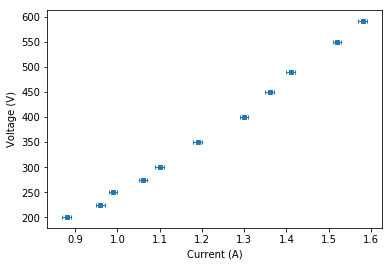

In [23]:
plt.errorbar(I_1,V,xerr=0.01, yerr=1, linewidth=0, marker='s', ms=4, elinewidth=1, capsize=2)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.show()

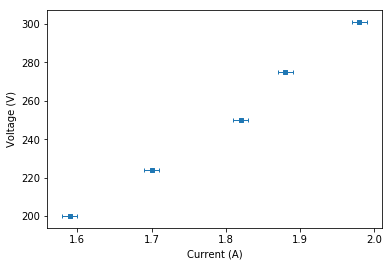

In [24]:
plt.errorbar(I_2,V[:5],xerr=0.01, yerr=1, linewidth=0, marker='s', ms=4, elinewidth=1, capsize=2)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.show()

In [37]:
coeff1 = np.polyfit(I_1**2,V,1)
f1 = np.poly1d(coeff1)

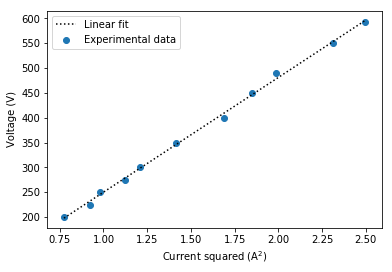

In [45]:
plt.scatter(I_1**2,V,label='Experimental data')
plt.plot(I_1**2,f1(I_1**2),color='k',ls=':',label='Linear fit')
plt.xlabel('Current squared (A$^2$)')
plt.ylabel('Voltage (V)')

plt.legend()
plt.show()

In [46]:
coeff2 = np.polyfit(I_2**2,V[:5],1)
f2 = np.poly1d(coeff2)

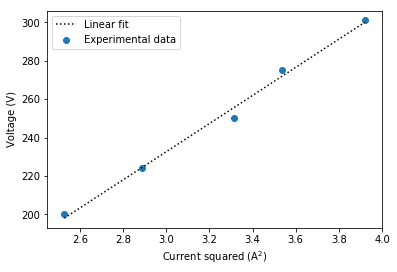

In [47]:
plt.scatter(I_2**2,V[:5],label='Experimental data')
plt.plot(I_2**2,f2(I_2**2),color='k',ls=':',label='Linear fit')
plt.xlabel('Current squared (A$^2$)')
plt.ylabel('Voltage (V)')

plt.legend()
plt.show()

In [48]:
coeff1

array([231.09110425,  18.98579686])

In [49]:
coeff2

array([73.2659841, 12.8336135])

In [59]:
a=8*(np.pi**2)*(0.15215**2)/(((4*np.pi*10**(-7))**2)*(372**2)*(0.111)**2)

In [60]:
coeff1[0]*a

156879179128.7467

In [88]:
coeff2[0]*a/4

12434389762.903048

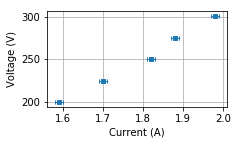

In [70]:
plt.figure(figsize=(figw,figw/1.61))
plt.errorbar(I_2,V[:5],xerr=0.01, yerr=1, linewidth=0, marker='s', ms=4, elinewidth=1, capsize=2)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')

plt.grid()
plt.tight_layout()
plt.savefig('n2.pdf')

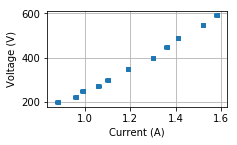

In [71]:
plt.figure(figsize=(figw,figw/1.61))
plt.errorbar(I_1,V,xerr=0.01, yerr=1, linewidth=0, marker='s', ms=4, elinewidth=1, capsize=2)
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')

plt.grid()
plt.tight_layout()
plt.savefig('n1.pdf')

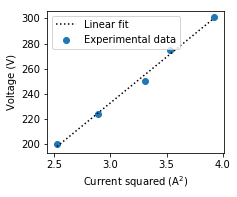

In [77]:
plt.figure(figsize=(figw,figw/1.2))
plt.scatter(I_2**2,V[:5],label='Experimental data')
plt.plot(I_2**2,f2(I_2**2),color='k',ls=':',label='Linear fit')
plt.xlabel('Current squared (A$^2$)')
plt.ylabel('Voltage (V)')

plt.legend()
plt.tight_layout()
plt.savefig('n2f.pdf')

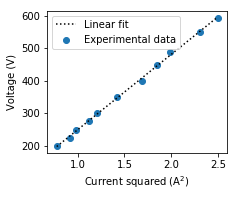

In [76]:
plt.figure(figsize=(figw,figw/1.2))
plt.scatter(I_1**2,V,label='Experimental data')
plt.plot(I_1**2,f1(I_1**2),color='k',ls=':',label='Linear fit')
plt.xlabel('Current squared (A$^2$)')
plt.ylabel('Voltage (V)')

plt.legend()
plt.tight_layout()
plt.savefig('n1f.pdf')

## Error propagation

In [83]:
sqsum = sum((V[:5]-f2(I_2**2))**2)

In [84]:
Delta = 5*sum((I_2**2)**2)-(sum(I_2**2))**2

In [85]:
sigma = np.sqrt(1/3*sqsum)

In [86]:
unc_s = sigma*np.sqrt(5/Delta)

In [87]:
unc_s

3.5898917579936187

In [ ]:
231